# Perturbation Analysis

Can INFFT enforce constraints while still staying close to target function? 
In other words, if our target function slightly violates the constraints, does the result from the INFFT still come close to approximating it?

In [1]:
from qsppack import nlfa

from matplotlib import pyplot as plt
import numpy as np
from numpy.polynomial import chebyshev as cheb

## Get coeffs for Cheb approx of target function that violates constraints slightly

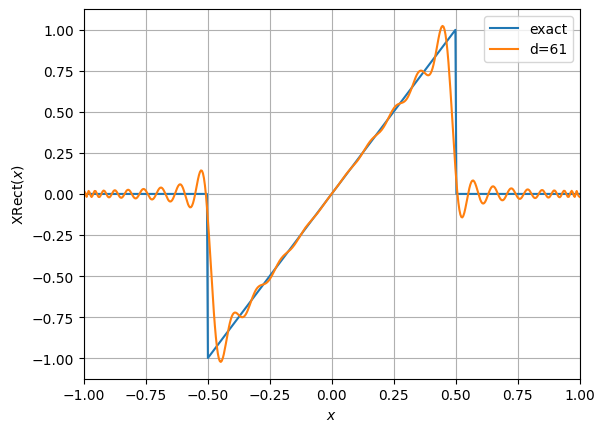

In [2]:
def f(x):
    if x < -1/2:
        return 0
    elif x >= -1/2 and x <= 1/2:
        return 2*x
    else:
        return 0
def f_vec(x):
    return np.array([f(xval) for xval in x])

x = np.linspace(-1, 1, 500)
y = f_vec(x)
degree = 61
coeffs = cheb.chebinterpolate(f_vec, degree)
coeffs[::2] = np.zeros(len(coeffs)//2) # enforce odd constraint

# format and show
plt.grid()
plt.plot(x, y, label="exact")
plt.plot(x, cheb.chebval(x, coeffs), label=f"d={degree}")
plt.xlim(-1, 1)
plt.xlabel(r"$x$")
plt.ylabel(r"XRect$(x)$")
plt.legend()
plt.show()

## Apply INFFT and then NFFT

In [14]:
bcoeffs = nlfa.b_from_cheb(coeffs[1::2], 1)
acoeffs = nlfa.weiss(bcoeffs, 2**6)
gammas, _, _ =nlfa.inverse_nonlinear_FFT(acoeffs, bcoeffs)
print(f"gammas: {gammas}")
new_a, new_b = nlfa.forward_nonlinear_FFT(gammas)

gammas: [-1.48759708e-02  2.60673489e-03  1.38444062e-02 -1.90610604e-02
  6.85011801e-03  1.30045465e-02 -2.25895352e-02  1.20226966e-02
  1.05358507e-02 -2.50293486e-02  1.72669966e-02  7.25066855e-03
 -2.68573448e-02  2.26473188e-02  3.44453309e-03 -2.85765410e-02
  2.85843190e-02 -8.38067657e-04 -3.08918497e-02  3.60720012e-02
 -5.89672476e-03 -3.50965885e-02  4.76015208e-02 -1.30095039e-02
 -4.43637727e-02  7.13570374e-02 -2.85366530e-02 -7.07473358e-02
  1.61825458e-01 -1.68506322e-01  7.19482136e-02  6.83302751e-02
 -1.66581782e-01  1.63289348e-01 -7.49687656e-02 -2.40303599e-02
  6.97497885e-02 -4.73834629e-02 -7.03808783e-03  4.30797292e-02
 -3.59912994e-02  3.63221670e-04  2.90645075e-02 -2.89901624e-02
  4.50058445e-03  1.98326362e-02 -2.35274137e-02  6.68789642e-03
  1.31837651e-02 -1.86700418e-02  7.31671187e-03  8.40853522e-03
 -1.41316303e-02  6.48877198e-03  5.41213493e-03 -9.96544818e-03
  4.14674404e-03  4.60316232e-03 -6.65723175e-03  4.17206132e-05
  7.73385383e-03 

## Check new function

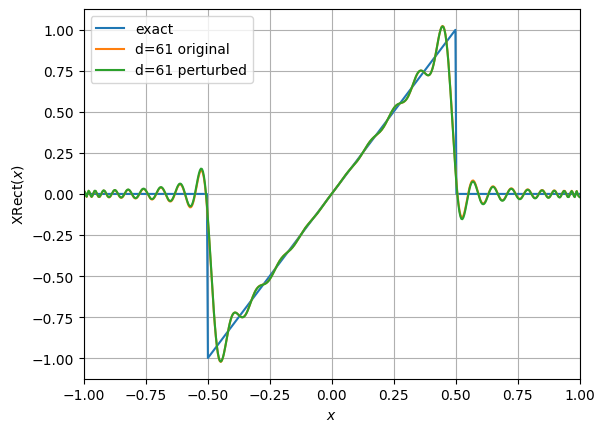

In [13]:
new_coeffs = np.zeros(len(coeffs))
new_coeffs[1::2] = 2*new_b[int(len(new_b)/2-1)::-1]

plt.grid()
plt.plot(x, y, label="exact")
plt.plot(x, cheb.chebval(x, coeffs), label=f"d={degree} original")
plt.plot(x, cheb.chebval(x, new_coeffs), label=f"d={degree} perturbed")
plt.xlim(-1, 1)
plt.xlabel(r"$x$")
plt.ylabel(r"XRect$(x)$")
plt.legend()
plt.show()